# Merge Sort Parallelization with MPI

- **Author:** *Mariusz Wiśniewski*

## Task

- Implement a general approach for distributing the work of merge sort over multiple processes.
- The provided merging algorithm must not be modified, nor should the vector generators.
- Test the correctness of your algorithm against all three provided vectors (1024, 729, 997 elements).
- Test the correctness of your algorithm when run with 2, 3, 5 processes.
- Evaluate the load balance on the processes in the different configurations, as well as the overall computation time of the program.

In [ ]:
!mkdir -p /home/mpi/common
!mkdir /home/mpi/idle
!mkdir /home/mpi/remainder_distribution

!mkdir -p /home/mpi/build/idle
!mkdir /home/mpi/build/remainder_distribution

!mkdir -p /home/mpi/output

In [ ]:
%%writefile /home/mpi/common/helpers.h

#include <vector>
#include <iostream>

void merge(const std::vector<int> &src1, const std::vector<int> &src2, std::vector<int> &vect);

void mergeSort(std::vector<int> &vect);

/* returns a vector of 1024 int vals */
std::vector<int> getEvenArray();

bool checkEvenArray(const std::vector<int> &vect);

/* returns a vector of 729 (3^6) int vals */
std::vector<int> getOddArray();

bool checkOddArray(const std::vector<int> &vect);

/* returns a vector of 997 (prime) int vals */
std::vector<int> getPrimeArray();

bool checkPrimeArray(const std::vector<int> &vect);

Writing /home/mpi/common/helpers.h


In [ ]:
%%writefile /home/mpi/common/helpers.cpp

#include "helpers.h"

void merge(const std::vector<int> &src1, const std::vector<int> &src2, std::vector<int> &vect) {
    auto cur = vect.begin();
    auto it1 = src1.begin();
    auto it2 = src2.begin();

    if (vect.size() < src1.size() + src2.size()) {
        vect.resize(src1.size() + src2.size());
    }

    while (it1 != src1.end() && it2 != src2.end()) {
        if (*it1 <= *it2) {
            *cur = *it1;
            it1++;
        } else {
            *cur = *it2;
            it2++;
        }
        cur++;
    }

    while (it1 != src1.end()) {
        *cur = *it1;
        it1++;
        cur++;
    }

    while (it2 != src2.end()) {
        *cur = *it2;
        it2++;
        cur++;
    }
}

void mergeSort(std::vector<int> &vect) {

    if (vect.size() <= 1) {
        return;
    }

    std::vector<int> v1, v2;

    unsigned int i = 0;
    for (; i < vect.size() / 2; ++i) {
        v1.push_back(vect[i]);
    }

    for (; i < vect.size(); ++i) {
        v2.push_back(vect[i]);
    }

    mergeSort(v1);
    mergeSort(v2);

    merge(v1, v2, vect);
}

std::vector<int> getEvenArray() {
    std::vector<int> evenArray = {94, 40, 82, 66, 31, 42, 73, 61, 88, 63, 46, 99, 97, 25, 43, 47, 13, 87, 58, 65, 14,
                                  24, 94, 78, 22, 2, 51, 89, 90, 99, 27, 45, 62, 35, 50, 26, 39, 68, 33, 66, 68, 37, 24,
                                  80, 94, 30, 12, 62, 13, 2, 7, 92, 77, 96, 54, 70, 25, 94, 53, 15, 82, 68, 47, 23, 86,
                                  97, 68, 26, 94, 17, 8, 15, 34, 51, 26, 73, 97, 2, 38, 21, 26, 87, 60, 23, 8, 51, 90,
                                  84, 34, 98, 81, 21, 13, 60, 40, 13, 79, 38, 39, 5, 21, 32, 41, 76, 63, 50, 98, 86, 4,
                                  76, 88, 57, 98, 22, 4, 50, 93, 84, 18, 3, 44, 67, 40, 5, 26, 60, 25, 46, 37, 89, 1,
                                  47, 62, 78, 82, 88, 22, 54, 45, 43, 90, 1, 79, 72, 92, 46, 70, 77, 34, 59, 32, 74, 5,
                                  13, 92, 29, 48, 22, 53, 85, 35, 56, 70, 77, 47, 10, 3, 77, 77, 99, 94, 73, 60, 78, 50,
                                  19, 76, 62, 14, 64, 33, 70, 30, 74, 40, 58, 66, 60, 16, 14, 14, 45, 31, 44, 28, 66,
                                  98, 60, 18, 46, 67, 25, 78, 26, 62, 38, 18, 28, 61, 96, 46, 21, 75, 40, 32, 68, 9, 22,
                                  6, 46, 2, 2, 85, 59, 1, 59, 23, 15, 2, 19, 49, 97, 35, 18, 49, 23, 38, 84, 52, 78, 96,
                                  76, 1, 92, 14, 54, 18, 25, 88, 5, 60, 19, 11, 82, 27, 59, 82, 57, 20, 23, 44, 30, 43,
                                  15, 10, 42, 47, 24, 72, 39, 79, 99, 54, 42, 40, 15, 83, 84, 54, 9, 3, 9, 14, 26, 96,
                                  70, 84, 85, 73, 80, 39, 66, 32, 25, 39, 81, 28, 13, 17, 5, 70, 91, 52, 38, 93, 87, 5,
                                  25, 36, 8, 44, 94, 39, 37, 92, 3, 35, 55, 95, 57, 41, 25, 69, 82, 3, 98, 98, 31, 32,
                                  87, 62, 39, 84, 66, 23, 89, 54, 46, 95, 85, 36, 97, 80, 50, 97, 76, 87, 61, 25, 23,
                                  35, 93, 90, 84, 21, 48, 79, 31, 61, 78, 31, 29, 69, 13, 51, 3, 71, 35, 87, 3, 86, 63,
                                  43, 1, 9, 97, 60, 38, 62, 86, 39, 47, 89, 44, 39, 77, 87, 41, 42, 59, 37, 36, 60, 87,
                                  23, 87, 61, 73, 82, 87, 85, 85, 96, 73, 39, 92, 33, 5, 19, 55, 24, 72, 25, 55, 18, 98,
                                  73, 39, 15, 72, 89, 47, 79, 33, 39, 90, 90, 49, 14, 54, 31, 3, 78, 59, 45, 93, 8, 51,
                                  81, 9, 15, 81, 69, 44, 95, 71, 51, 68, 62, 60, 11, 70, 37, 31, 55, 75, 54, 68, 2, 65,
                                  9, 74, 58, 11, 35, 89, 61, 96, 80, 56, 57, 49, 21, 44, 72, 77, 29, 89, 25, 31, 25, 19,
                                  78, 40, 2, 94, 19, 91, 48, 28, 86, 5, 14, 7, 63, 8, 15, 10, 39, 72, 3, 83, 52, 32, 64,
                                  29, 32, 28, 4, 27, 86, 18, 32, 48, 59, 93, 97, 74, 62, 94, 12, 53, 63, 46, 69, 61, 2,
                                  87, 83, 29, 59, 11, 77, 43, 81, 32, 26, 69, 54, 85, 82, 48, 42, 30, 24, 62, 19, 36,
                                  32, 63, 10, 83, 14, 92, 59, 56, 67, 59, 10, 13, 59, 64, 33, 32, 52, 55, 53, 95, 24,
                                  48, 76, 20, 63, 95, 45, 32, 55, 45, 11, 91, 64, 27, 59, 7, 77, 52, 70, 21, 35, 91, 24,
                                  35, 61, 59, 3, 29, 2, 6, 70, 21, 50, 90, 48, 68, 5, 15, 14, 81, 90, 84, 78, 92, 31,
                                  19, 10, 50, 45, 20, 86, 35, 50, 5, 42, 46, 39, 38, 65, 63, 64, 53, 83, 21, 46, 81, 13,
                                  88, 12, 6, 59, 44, 59, 71, 36, 48, 3, 15, 93, 71, 68, 16, 59, 12, 46, 63, 93, 97, 30,
                                  19, 20, 30, 24, 14, 45, 8, 5, 37, 41, 52, 97, 11, 40, 26, 31, 37, 91, 86, 95, 5, 84,
                                  14, 59, 95, 64, 38, 66, 68, 26, 34, 85, 58, 80, 66, 68, 75, 88, 97, 37, 47, 4, 39, 68,
                                  54, 80, 92, 59, 70, 67, 56, 65, 28, 12, 92, 33, 44, 9, 46, 83, 22, 85, 95, 76, 53, 28,
                                  7, 98, 36, 33, 4, 14, 89, 76, 18, 53, 31, 37, 31, 37, 14, 67, 25, 54, 42, 11, 93, 31,
                                  84, 26, 67, 46, 60, 99, 62, 48, 76, 31, 72, 35, 85, 32, 28, 96, 77, 32, 42, 21, 10,
                                  35, 85, 44, 96, 13, 81, 21, 86, 89, 43, 20, 35, 97, 36, 70, 75, 17, 13, 55, 76, 63,
                                  18, 98, 99, 78, 88, 86, 19, 55, 69, 60, 43, 52, 36, 37, 57, 20, 89, 64, 59, 97, 20,
                                  39, 6, 99, 43, 61, 93, 74, 35, 40, 97, 59, 84, 52, 57, 67, 92, 95, 38, 65, 73, 10, 75,
                                  92, 2, 10, 81, 36, 3, 92, 59, 62, 81, 16, 3, 76, 28, 65, 76, 47, 54, 68, 72, 52, 3,
                                  16, 25, 52, 20, 39, 97, 41, 45, 24, 57, 83, 43, 21, 49, 93, 38, 88, 7, 30, 21, 53, 74,
                                  71, 74, 43, 56, 13, 69, 40, 5, 26, 94, 97, 72, 59, 43, 82, 2, 72, 14, 61, 71, 58, 84,
                                  5, 51, 52, 1, 22, 74, 54, 66, 6, 1, 38, 56, 91, 17, 91, 83, 42, 3, 14, 21, 39, 60, 43,
                                  33, 42, 5, 52, 9, 38, 86, 53, 23, 91, 8, 93, 40, 38, 79, 15, 32, 86, 58, 36, 39, 85,
                                  69, 33, 25, 76, 4, 23, 43, 39, 25, 74, 80, 33, 5, 93, 83, 88, 64, 54, 97, 24, 27, 59,
                                  70, 70, 27, 78, 46, 80, 9, 41, 10, 96, 47, 92, 73, 21, 55, 92, 63, 90, 15, 5, 24, 87,
                                  99, 20, 65, 83, 5, 9, 84, 59, 9, 16, 7, 14, 66, 92, 84, 15, 14, 87, 25, 53, 43, 77,
                                  71, 95, 73, 76, 14, 87, 24, 68, 41, 28, 30, 75, 9, 74, 73, 15, 94};
    return evenArray;
}

bool checkEvenArray(const std::vector<int> &vect) {
    std::vector<int> correct = {1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
                                3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
                                6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
                                9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12,
                                12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14,
                                14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
                                15, 15, 16, 16, 16, 16, 16, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19,
                                19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21,
                                21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23,
                                23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25,
                                25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26,
                                26, 26, 27, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29,
                                29, 29, 30, 30, 30, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31,
                                31, 31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33,
                                33, 33, 33, 33, 33, 34, 34, 34, 34, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35,
                                35, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37,
                                38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 39, 39, 39, 39, 39, 39, 39, 39, 39,
                                39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40,
                                41, 41, 41, 41, 41, 41, 41, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 43, 43, 43, 43, 43,
                                43, 43, 43, 43, 43, 43, 43, 43, 43, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 45, 45, 45,
                                45, 45, 45, 45, 45, 45, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 47, 47,
                                47, 47, 47, 47, 47, 47, 47, 47, 48, 48, 48, 48, 48, 48, 48, 48, 48, 49, 49, 49, 49, 49,
                                50, 50, 50, 50, 50, 50, 50, 50, 51, 51, 51, 51, 51, 51, 51, 52, 52, 52, 52, 52, 52, 52,
                                52, 52, 52, 52, 52, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 54, 54, 54, 54, 54, 54, 54,
                                54, 54, 54, 54, 54, 54, 54, 55, 55, 55, 55, 55, 55, 55, 55, 55, 56, 56, 56, 56, 56, 56,
                                57, 57, 57, 57, 57, 57, 57, 58, 58, 58, 58, 58, 58, 59, 59, 59, 59, 59, 59, 59, 59, 59,
                                59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 60, 60, 60, 60, 60, 60, 60,
                                60, 60, 60, 60, 60, 60, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 62, 62, 62, 62, 62, 62,
                                62, 62, 62, 62, 62, 62, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 64, 64, 64, 64, 64,
                                64, 64, 64, 65, 65, 65, 65, 65, 65, 65, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 67, 67,
                                67, 67, 67, 67, 67, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 69, 69, 69,
                                69, 69, 69, 69, 69, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 71, 71, 71, 71,
                                71, 71, 71, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 73, 73, 73, 73, 73, 73, 73, 73, 73,
                                73, 73, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 75, 75, 75, 75, 75, 75, 76, 76, 76, 76,
                                76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 78,
                                78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 79, 79, 79, 79, 79, 79, 80, 80, 80, 80, 80, 80,
                                80, 80, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 82, 82, 82, 82, 82, 82, 82, 82, 82, 83,
                                83, 83, 83, 83, 83, 83, 83, 83, 83, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84,
                                84, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 86, 86, 86, 86, 86, 86, 86, 86, 86,
                                86, 86, 86, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 88, 88, 88, 88, 88,
                                88, 88, 88, 88, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 90, 90, 90, 90, 90, 90, 90, 90,
                                90, 91, 91, 91, 91, 91, 91, 91, 91, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92,
                                92, 92, 92, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 94, 94, 94, 94, 94, 94, 94,
                                94, 94, 94, 94, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 96, 96, 96, 96, 96, 96, 96, 96,
                                96, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 98, 98, 98, 98,
                                98, 98, 98, 98, 98, 99, 99, 99, 99, 99, 99, 99, 99};
    bool areSame = correct.size() == vect.size();

    if (!areSame) {
        std::cout << "Error in size: correct.size() = " << correct.size() << " while vect.size() = " << vect.size()
                  << std::endl;
    }

    for (int ii = 0; areSame && ii < correct.size(); ++ii) {
        areSame &= correct[ii] == vect[ii];

        if (!areSame) {
            std::cout << "Error in position " << ii << ": correct [" << ii << "] = " << correct[ii] << " while vect["
                      << ii << "] = " << vect[ii] << std::endl;
        }
    }
    return areSame;
}

std::vector<int> getOddArray() {
    std::vector<int> oddArray = {70, 91, 49, 10, 47, 26, 49, 31, 21, 28, 97, 96, 90, 32, 16, 80, 45, 61, 83, 73, 40, 58,
                                 46, 76, 93, 61, 84, 33, 5, 11, 15, 72, 75, 59, 41, 9, 89, 33, 9, 69, 52, 40, 69, 55,
                                 10, 63, 36, 9, 25, 44, 40, 6, 61, 62, 26, 64, 97, 30, 7, 24, 77, 39, 46, 94, 76, 45,
                                 54, 52, 23, 6, 43, 76, 49, 6, 21, 14, 6, 40, 87, 72, 21, 80, 1, 8, 11, 34, 30, 28, 4,
                                 9, 85, 9, 63, 47, 8, 58, 21, 3, 14, 95, 6, 18, 83, 28, 38, 76, 37, 27, 7, 51, 85, 40,
                                 77, 20, 20, 85, 99, 5, 97, 11, 43, 17, 96, 80, 70, 73, 5, 93, 5, 68, 96, 22, 43, 20,
                                 76, 41, 31, 40, 98, 55, 4, 60, 64, 82, 84, 31, 85, 85, 48, 31, 26, 15, 39, 75, 89, 64,
                                 92, 16, 3, 65, 13, 51, 11, 23, 12, 24, 8, 88, 53, 28, 88, 15, 21, 89, 99, 40, 43, 93,
                                 16, 58, 44, 64, 21, 26, 66, 61, 72, 10, 62, 90, 48, 89, 23, 37, 95, 2, 2, 42, 53, 13,
                                 63, 88, 85, 32, 7, 70, 1, 3, 54, 44, 62, 53, 78, 78, 73, 29, 74, 18, 89, 58, 73, 75,
                                 71, 23, 50, 38, 7, 91, 61, 29, 45, 8, 61, 94, 6, 72, 23, 2, 85, 71, 3, 96, 28, 5, 64,
                                 40, 22, 49, 70, 72, 18, 45, 24, 5, 35, 11, 14, 25, 77, 84, 76, 67, 69, 17, 80, 72, 27,
                                 92, 59, 67, 41, 14, 50, 7, 83, 79, 79, 29, 52, 47, 55, 37, 14, 80, 50, 41, 81, 60, 42,
                                 2, 91, 68, 99, 47, 33, 80, 12, 77, 48, 50, 31, 83, 28, 12, 12, 26, 75, 54, 97, 11, 3,
                                 48, 73, 76, 45, 35, 47, 34, 54, 4, 12, 85, 82, 12, 83, 21, 23, 27, 10, 60, 56, 28, 43,
                                 74, 76, 85, 83, 40, 28, 18, 68, 59, 53, 77, 62, 80, 28, 15, 77, 58, 15, 10, 99, 37, 61,
                                 42, 93, 25, 41, 93, 71, 35, 78, 19, 2, 78, 11, 54, 2, 37, 78, 46, 70, 19, 93, 58, 31,
                                 96, 31, 18, 80, 7, 34, 49, 14, 92, 77, 64, 5, 89, 47, 66, 22, 24, 61, 63, 99, 9, 52, 3,
                                 11, 77, 21, 20, 11, 55, 54, 2, 61, 56, 94, 71, 39, 15, 16, 76, 6, 68, 13, 42, 81, 4,
                                 95, 66, 94, 70, 66, 40, 37, 27, 10, 78, 17, 30, 61, 74, 73, 16, 98, 84, 17, 11, 65, 8,
                                 13, 13, 28, 27, 32, 50, 17, 61, 36, 42, 21, 88, 25, 44, 69, 74, 87, 7, 53, 29, 56, 80,
                                 49, 54, 75, 40, 82, 42, 10, 99, 35, 62, 23, 93, 95, 49, 74, 59, 81, 87, 16, 93, 43, 33,
                                 52, 36, 43, 95, 54, 2, 55, 24, 7, 55, 10, 12, 72, 10, 59, 19, 45, 67, 65, 91, 27, 78,
                                 55, 61, 87, 62, 23, 10, 63, 95, 99, 82, 47, 54, 27, 27, 93, 48, 81, 72, 39, 27, 26, 92,
                                 55, 86, 10, 94, 99, 43, 17, 34, 75, 43, 64, 28, 81, 67, 70, 18, 11, 67, 97, 80, 1, 85,
                                 52, 94, 35, 39, 57, 23, 33, 7, 2, 84, 47, 22, 40, 54, 18, 55, 96, 98, 3, 7, 81, 98, 68,
                                 72, 26, 19, 42, 21, 15, 98, 34, 34, 68, 65, 76, 70, 91, 60, 73, 18, 14, 37, 64, 42, 90,
                                 19, 45, 50, 69, 3, 78, 67, 75, 34, 2, 15, 73, 97, 17, 85, 96, 62, 2, 21, 96, 44, 36,
                                 35, 50, 66, 30, 36, 81, 19, 10, 57, 10, 4, 67, 20, 74, 52, 8, 65, 61, 36, 64, 17, 39,
                                 91, 76, 60, 65, 47, 4, 15, 22, 77, 46, 56, 12, 69, 57, 28, 11, 91, 13, 75, 57, 93, 66,
                                 48, 69, 91, 53, 97, 62, 87, 48, 23, 71, 6, 55, 52, 37, 82, 27, 64, 42, 99, 49, 4, 60,
                                 15, 7, 47, 37, 15, 77, 61, 16, 31, 88, 91, 8, 76, 11, 38, 32, 99, 35, 98, 93, 42, 62,
                                 91, 48, 36, 97, 91, 1, 67, 50, 84, 91, 47, 84, 97, 73, 12, 77, 39, 62, 10, 81};
    return oddArray;
}

bool checkOddArray(const std::vector<int> &vect) {
    std::vector<int> correct = {1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4,
                                4, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8,
                                8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
                                11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12,
                                13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15,
                                15, 15, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18,
                                18, 18, 18, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21,
                                21, 21, 21, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24,
                                24, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27,
                                28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 30, 30, 30, 30, 31, 31,
                                31, 31, 31, 31, 31, 31, 32, 32, 32, 32, 33, 33, 33, 33, 33, 34, 34, 34, 34, 34, 34, 34,
                                35, 35, 35, 35, 35, 35, 35, 36, 36, 36, 36, 36, 36, 36, 37, 37, 37, 37, 37, 37, 37, 37,
                                37, 38, 38, 38, 39, 39, 39, 39, 39, 39, 39, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40,
                                40, 41, 41, 41, 41, 41, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 43, 43, 43, 43, 43, 43,
                                43, 43, 43, 44, 44, 44, 44, 44, 45, 45, 45, 45, 45, 45, 45, 46, 46, 46, 46, 47, 47, 47,
                                47, 47, 47, 47, 47, 47, 47, 47, 48, 48, 48, 48, 48, 48, 48, 48, 49, 49, 49, 49, 49, 49,
                                49, 49, 50, 50, 50, 50, 50, 50, 50, 50, 51, 51, 52, 52, 52, 52, 52, 52, 52, 52, 53, 53,
                                53, 53, 53, 53, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 55, 55, 55, 55, 55, 55, 55, 55,
                                55, 55, 56, 56, 56, 56, 57, 57, 57, 57, 58, 58, 58, 58, 58, 58, 59, 59, 59, 59, 59, 60,
                                60, 60, 60, 60, 60, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 62, 62, 62,
                                62, 62, 62, 62, 62, 62, 62, 63, 63, 63, 63, 63, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64,
                                65, 65, 65, 65, 65, 65, 66, 66, 66, 66, 66, 66, 67, 67, 67, 67, 67, 67, 67, 67, 68, 68,
                                68, 68, 68, 68, 69, 69, 69, 69, 69, 69, 69, 70, 70, 70, 70, 70, 70, 70, 70, 71, 71, 71,
                                71, 71, 72, 72, 72, 72, 72, 72, 72, 72, 72, 73, 73, 73, 73, 73, 73, 73, 73, 73, 74, 74,
                                74, 74, 74, 74, 75, 75, 75, 75, 75, 75, 75, 75, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76,
                                76, 76, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 78, 78, 78, 78, 78, 78, 78, 78, 79,
                                79, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 81, 81, 81, 81, 81, 81, 81, 81, 82, 82, 82,
                                82, 82, 83, 83, 83, 83, 83, 83, 84, 84, 84, 84, 84, 84, 84, 85, 85, 85, 85, 85, 85, 85,
                                85, 85, 85, 85, 86, 87, 87, 87, 87, 87, 88, 88, 88, 88, 88, 89, 89, 89, 89, 89, 89, 90,
                                90, 90, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 92, 92, 92, 92, 93, 93, 93, 93,
                                93, 93, 93, 93, 93, 93, 93, 94, 94, 94, 94, 94, 94, 95, 95, 95, 95, 95, 95, 96, 96, 96,
                                96, 96, 96, 96, 96, 97, 97, 97, 97, 97, 97, 97, 97, 97, 98, 98, 98, 98, 98, 98, 99, 99,
                                99, 99, 99, 99, 99, 99, 99, 99};
    bool areSame = correct.size() == vect.size();

    if (!areSame) {
        std::cout << "Error in size: correct.size() = " << correct.size() << " while vect.size() = " << vect.size()
                  << std::endl;
    }

    for (int ii = 0; areSame && ii < correct.size(); ++ii) {
        areSame &= correct[ii] == vect[ii];

        if (!areSame) {
            std::cout << "Error in position " << ii << ": correct [" << ii << "] = " << correct[ii] << " while vect["
                      << ii << "] = " << vect[ii] << std::endl;
        }
    }
    return areSame;
}

std::vector<int> getPrimeArray() {
    std::vector<int> primeArray = {52, 43, 4, 30, 97, 68, 38, 21, 35, 9, 23, 4, 31, 88, 43, 55, 95, 34, 9, 58, 46, 57,
                                   57, 63, 79, 18, 94, 10, 24, 32, 22, 54, 33, 70, 11, 32, 76, 44, 71, 40, 87, 65, 50,
                                   98, 88, 77, 95, 98, 82, 41, 84, 96, 93, 79, 67, 61, 28, 44, 3, 86, 33, 83, 97, 35,
                                   56, 68, 76, 7, 57, 42, 66, 95, 77, 3, 47, 56, 49, 5, 27, 75, 12, 70, 65, 94, 37, 20,
                                   46, 85, 91, 80, 14, 88, 52, 52, 68, 16, 79, 27, 56, 91, 92, 78, 62, 75, 1, 78, 74,
                                   41, 13, 36, 6, 19, 29, 63, 63, 79, 82, 5, 94, 76, 93, 66, 34, 70, 89, 13, 60, 76, 47,
                                   20, 66, 33, 57, 51, 8, 4, 87, 98, 17, 12, 26, 59, 44, 4, 50, 59, 91, 69, 97, 25, 8,
                                   91, 60, 63, 58, 53, 20, 66, 90, 56, 11, 67, 68, 26, 32, 61, 36, 87, 98, 92, 7, 77,
                                   33, 8, 24, 74, 65, 37, 70, 26, 11, 94, 47, 50, 9, 87, 20, 78, 77, 32, 37, 41, 95, 44,
                                   38, 92, 22, 29, 62, 53, 11, 35, 27, 7, 89, 15, 97, 42, 42, 98, 66, 52, 83, 63, 53,
                                   71, 87, 8, 26, 78, 4, 26, 97, 41, 83, 83, 24, 44, 2, 8, 70, 15, 12, 6, 51, 10, 89,
                                   53, 28, 1, 12, 25, 11, 89, 76, 37, 61, 76, 7, 53, 15, 27, 69, 23, 53, 53, 47, 99, 41,
                                   63, 91, 21, 23, 65, 14, 32, 12, 75, 48, 47, 62, 31, 65, 7, 45, 64, 98, 79, 42, 90,
                                   59, 28, 18, 22, 23, 55, 78, 95, 1, 10, 46, 6, 28, 73, 30, 27, 33, 29, 65, 31, 95, 70,
                                   47, 71, 18, 7, 26, 96, 45, 2, 38, 37, 11, 37, 70, 43, 52, 83, 91, 40, 44, 50, 84, 47,
                                   41, 70, 58, 92, 30, 60, 58, 84, 46, 16, 38, 93, 59, 22, 14, 4, 10, 20, 83, 52, 73,
                                   54, 96, 16, 14, 94, 69, 51, 50, 81, 9, 13, 81, 99, 60, 86, 79, 36, 43, 68, 15, 41,
                                   57, 24, 60, 90, 7, 86, 5, 63, 16, 57, 51, 27, 16, 57, 71, 38, 88, 43, 98, 93, 81, 22,
                                   63, 92, 79, 73, 96, 4, 6, 68, 68, 33, 79, 29, 74, 24, 39, 94, 82, 30, 8, 9, 66, 81,
                                   75, 88, 15, 65, 87, 43, 95, 45, 36, 42, 80, 29, 30, 31, 40, 15, 27, 96, 97, 76, 41,
                                   40, 27, 24, 88, 66, 87, 5, 98, 4, 79, 3, 77, 79, 76, 63, 42, 43, 52, 48, 34, 37, 45,
                                   17, 33, 89, 54, 29, 82, 28, 95, 10, 77, 28, 64, 9, 65, 18, 41, 8, 44, 71, 89, 53, 39,
                                   13, 76, 19, 32, 51, 33, 62, 22, 33, 11, 80, 54, 55, 53, 8, 79, 32, 99, 61, 68, 69,
                                   90, 91, 5, 61, 52, 68, 81, 62, 16, 55, 50, 34, 17, 47, 38, 78, 26, 68, 39, 16, 90, 6,
                                   36, 93, 82, 30, 87, 21, 40, 87, 23, 93, 77, 21, 43, 86, 54, 16, 14, 39, 58, 52, 42,
                                   14, 78, 27, 59, 68, 34, 70, 83, 47, 28, 5, 74, 11, 59, 66, 66, 15, 7, 72, 51, 97, 63,
                                   78, 61, 60, 35, 2, 91, 81, 40, 37, 91, 79, 14, 84, 69, 90, 30, 61, 58, 99, 93, 94,
                                   93, 19, 9, 31, 81, 95, 68, 18, 97, 32, 61, 63, 39, 13, 41, 38, 83, 60, 64, 72, 70,
                                   93, 51, 51, 51, 44, 94, 96, 31, 45, 22, 78, 6, 48, 34, 48, 34, 48, 35, 88, 72, 57,
                                   84, 3, 42, 11, 32, 41, 47, 85, 81, 22, 23, 19, 78, 56, 11, 59, 73, 37, 9, 45, 42, 76,
                                   26, 39, 25, 85, 69, 24, 71, 3, 53, 56, 50, 62, 6, 27, 60, 84, 41, 29, 20, 46, 88, 24,
                                   38, 5, 97, 41, 15, 1, 47, 19, 75, 23, 7, 95, 16, 29, 60, 2, 18, 90, 76, 74, 51, 98,
                                   61, 67, 28, 68, 54, 56, 72, 48, 74, 33, 87, 96, 9, 9, 77, 29, 41, 67, 5, 66, 34, 17,
                                   42, 75, 27, 76, 51, 86, 52, 83, 92, 4, 10, 30, 35, 24, 64, 53, 44, 45, 35, 71, 93,
                                   73, 56, 50, 46, 81, 54, 60, 29, 68, 65, 23, 58, 28, 28, 93, 20, 5, 10, 97, 9, 94, 97,
                                   80, 73, 22, 58, 92, 59, 77, 52, 35, 16, 57, 12, 39, 64, 64, 54, 31, 26, 84, 32, 78,
                                   76, 90, 68, 37, 18, 91, 44, 26, 67, 45, 27, 70, 58, 63, 10, 61, 6, 36, 98, 59, 50,
                                   16, 93, 3, 56, 72, 96, 38, 2, 6, 77, 25, 17, 29, 15, 83, 63, 46, 95, 92, 73, 58, 41,
                                   20, 9, 51, 96, 3, 8, 83, 66, 65, 51, 17, 69, 98, 21, 78, 72, 61, 66, 95, 43, 16, 2,
                                   90, 86, 84, 32, 68, 8, 72, 13, 59, 60, 44, 60, 6, 76, 28, 74, 56, 79, 75, 59, 3, 33,
                                   31, 48, 30, 52, 28, 42, 27, 16, 70, 61, 96, 8, 74, 8, 43, 51, 46, 44, 17, 6, 36, 32,
                                   38, 6, 8, 36, 43, 16, 15, 3, 55, 64, 34, 56, 67, 83, 64, 33, 24, 35, 96, 84, 87, 92,
                                   16, 11, 29, 60, 83, 89, 77, 12, 94, 56, 5, 27, 17, 57, 46, 8, 68, 6, 34, 72, 60, 65,
                                   49, 92, 44, 85, 10, 13, 80, 35, 17, 98, 57, 29, 56, 30, 48, 69, 81, 71, 98, 55, 9,
                                   64, 95, 76, 34, 15, 6, 66, 80, 60, 80, 10, 74, 73, 5, 60, 99, 81, 57, 15, 62, 66, 69,
                                   89, 1, 27, 45, 41, 45, 68, 46, 3, 46, 53, 87, 59, 75, 95, 81, 43, 99, 53, 34, 85, 53,
                                   36, 69, 29};
    return primeArray;
}

bool checkPrimeArray(const std::vector<int> &vect) {
    std::vector<int> correct = {1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4,
                                4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7,
                                7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9,
                                9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
                                11, 11, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14,
                                14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16,
                                16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
                                19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 22, 22, 22, 22,
                                22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24,
                                24, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 27,
                                27, 27, 27, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 29, 29,
                                29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
                                31, 31, 31, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33,
                                33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34,
                                35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 36, 36, 36, 36, 36, 36, 36, 36, 36, 37, 37, 37,
                                37, 37, 37, 37, 37, 37, 37, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 39, 39, 39, 39, 39,
                                39, 39, 40, 40, 40, 40, 40, 40, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41,
                                41, 41, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 43, 43, 43, 43, 43, 43, 43, 43, 43,
                                43, 43, 43, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 45, 45, 45, 45, 45, 45,
                                45, 45, 45, 45, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 47, 47, 47, 47, 47, 47, 47,
                                47, 47, 47, 47, 48, 48, 48, 48, 48, 48, 48, 48, 49, 49, 50, 50, 50, 50, 50, 50, 50, 50,
                                50, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 52, 52, 52, 52, 52, 52, 52,
                                52, 52, 52, 52, 52, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 54, 54, 54,
                                54, 54, 54, 54, 54, 55, 55, 55, 55, 55, 55, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56,
                                56, 56, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 58, 58, 58, 58, 58, 58, 58, 58,
                                58, 58, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 60, 60, 60, 60, 60, 60, 60, 60,
                                60, 60, 60, 60, 60, 60, 60, 60, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 62, 62,
                                62, 62, 62, 62, 62, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 64, 64, 64, 64,
                                64, 64, 64, 64, 64, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 66, 66, 66, 66, 66, 66,
                                66, 66, 66, 66, 66, 66, 66, 66, 67, 67, 67, 67, 67, 67, 68, 68, 68, 68, 68, 68, 68, 68,
                                68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 70, 70,
                                70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 71, 71, 71, 71, 71, 71, 71, 71, 72, 72, 72, 72,
                                72, 72, 72, 72, 73, 73, 73, 73, 73, 73, 73, 73, 74, 74, 74, 74, 74, 74, 74, 74, 74, 75,
                                75, 75, 75, 75, 75, 75, 75, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76,
                                77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78,
                                78, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 80, 80, 80, 80, 80, 80, 80, 81,
                                81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 82, 82, 82, 82, 82, 83, 83, 83, 83, 83, 83,
                                83, 83, 83, 83, 83, 83, 83, 84, 84, 84, 84, 84, 84, 84, 84, 84, 85, 85, 85, 85, 85, 86,
                                86, 86, 86, 86, 86, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 88, 88, 88, 88, 88,
                                88, 88, 88, 89, 89, 89, 89, 89, 89, 89, 89, 90, 90, 90, 90, 90, 90, 90, 90, 90, 91, 91,
                                91, 91, 91, 91, 91, 91, 91, 91, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 93, 93, 93, 93,
                                93, 93, 93, 93, 93, 93, 93, 93, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 95, 95, 95, 95,
                                95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 97,
                                97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98,
                                98, 99, 99, 99, 99, 99, 99};
    bool areSame = correct.size() == vect.size();

    if (!areSame) {
        std::cout << "Error in size: correct.size() = " << correct.size() << " while vect.size() = " << vect.size()
                  << std::endl;
    }

    for (int ii = 0; areSame && ii < correct.size(); ++ii) {
        areSame &= correct[ii] == vect[ii];

        if (!areSame) {
            std::cout << "Error in position " << ii << ": correct [" << ii << "] = " << correct[ii] << " while vect["
                      << ii << "] = " << vect[ii] << std::endl;
        }
    }
    return areSame;
}

Writing /home/mpi/common/helpers.cpp


## Leaving processes idle

This method was shown in the lecture. It may not use all the available processes.

In [ ]:
%%writefile /home/mpi/idle/primeMerge.cpp

#include "../common/helpers.h"
#include <mpi.h>

int main() {
    MPI_Init(nullptr, nullptr);
    int size, rank;
    MPI_Comm_size(MPI_COMM_WORLD, &size);
    MPI_Comm_rank(MPI_COMM_WORLD, &rank);

    std::vector<int> fullVec, smallVec;
    unsigned int chunkSize;
    bool checkRes;
    double initTime;

    if (rank == 0) {
        fullVec = getPrimeArray();
    }

    MPI_Comm newComm;
    int newSize = size;

    if (rank == 0) {
        while (fullVec.size() % newSize) {
            newSize--;
        }
        chunkSize = fullVec.size() / newSize;
        initTime = MPI_Wtime();
    }


    MPI_Bcast(&newSize, 1, MPI_INT, 0, MPI_COMM_WORLD);

    if (rank < newSize) {
        MPI_Comm_split(MPI_COMM_WORLD, 0, rank, &newComm);
    } else {
        MPI_Comm_split(MPI_COMM_WORLD, MPI_UNDEFINED, rank, &newComm);
        MPI_Finalize();
        return 0;
    }

    MPI_Bcast(&chunkSize, 1, MPI_UNSIGNED, 0, newComm);
    smallVec.resize(chunkSize);

    MPI_Scatter(&fullVec[0], chunkSize, MPI_INT, &smallVec[0], chunkSize, MPI_INT, 0, newComm);

    mergeSort(smallVec);

    if (rank == 0) {
        fullVec.clear();
        fullVec.resize(chunkSize * newSize);
    }

    MPI_Gather(&smallVec[0], chunkSize, MPI_INT, &fullVec[0], chunkSize, MPI_INT, 0, newComm);

    if (rank == 0) {
        mergeSort(fullVec);
        checkRes = checkPrimeArray(fullVec);

        std::cout << "Global vector check returned " << checkRes << " in " << MPI_Wtime() - initTime << "s"
                  << std::endl;
    }

    MPI_Finalize();
    return 0;
}

Writing /home/mpi/idle/primeMerge.cpp


In [ ]:
#@title
%%writefile /home/mpi/idle/evenMerge.cpp

#include "../common/helpers.h"
#include <mpi.h>

int main() {
    MPI_Init(nullptr, nullptr);
    int size, rank;
    MPI_Comm_size(MPI_COMM_WORLD, &size);
    MPI_Comm_rank(MPI_COMM_WORLD, &rank);

    std::vector<int> fullVec, smallVec;
    unsigned int chunkSize;
    bool checkRes;
    double initTime;

    if (rank == 0) {
      fullVec = getEvenArray();
    }

    MPI_Comm newComm;
    int newSize = size;

    if (rank == 0) {
        while (fullVec.size() % newSize) {
            newSize--;
        }
        chunkSize = fullVec.size() / newSize;
        initTime = MPI_Wtime();
    }


    MPI_Bcast(&newSize, 1, MPI_INT, 0, MPI_COMM_WORLD);

    if (rank < newSize) {
        MPI_Comm_split(MPI_COMM_WORLD, 0, rank, &newComm);
    } else {
        MPI_Comm_split(MPI_COMM_WORLD, MPI_UNDEFINED, rank, &newComm);
        MPI_Finalize();
        return 0;
    }

    MPI_Bcast(&chunkSize, 1, MPI_UNSIGNED, 0, newComm);
    smallVec.resize(chunkSize);

    MPI_Scatter(&fullVec[0], chunkSize, MPI_INT, &smallVec[0], chunkSize, MPI_INT, 0, newComm);

    mergeSort(smallVec);

    if (rank == 0) {
        fullVec.clear();
        fullVec.resize(chunkSize * newSize);
    }

    MPI_Gather(&smallVec[0], chunkSize, MPI_INT, &fullVec[0], chunkSize, MPI_INT, 0, newComm);

    if (rank == 0) {
        mergeSort(fullVec);
        checkRes = checkEvenArray(fullVec);

        std::cout << "Global vector check returned " << checkRes << " in " << MPI_Wtime() - initTime << "s"
                  << std::endl;
    }

    MPI_Finalize();
    return 0;
}

Writing /home/mpi/idle/evenMerge.cpp


In [ ]:
#@title
%%writefile /home/mpi/idle/oddMerge.cpp

#include "../common/helpers.h"
#include <mpi.h>

int main() {
    MPI_Init(nullptr, nullptr);
    int size, rank;
    MPI_Comm_size(MPI_COMM_WORLD, &size);
    MPI_Comm_rank(MPI_COMM_WORLD, &rank);

    std::vector<int> fullVec, smallVec;
    unsigned int chunkSize;
    bool checkRes;
    double initTime;

    if (rank == 0) {
      fullVec = getOddArray();
    }

    MPI_Comm newComm;
    int newSize = size;

    if (rank == 0) {
        while (fullVec.size() % newSize) {
            newSize--;
        }
        chunkSize = fullVec.size() / newSize;
        initTime = MPI_Wtime();
    }


    MPI_Bcast(&newSize, 1, MPI_INT, 0, MPI_COMM_WORLD);

    if (rank < newSize) {
        MPI_Comm_split(MPI_COMM_WORLD, 0, rank, &newComm);
    } else {
        MPI_Comm_split(MPI_COMM_WORLD, MPI_UNDEFINED, rank, &newComm);
        MPI_Finalize();
        return 0;
    }

    MPI_Bcast(&chunkSize, 1, MPI_UNSIGNED, 0, newComm);
    smallVec.resize(chunkSize);

    MPI_Scatter(&fullVec[0], chunkSize, MPI_INT, &smallVec[0], chunkSize, MPI_INT, 0, newComm);

    mergeSort(smallVec);

    if (rank == 0) {
        fullVec.clear();
        fullVec.resize(chunkSize * newSize);
    }

    MPI_Gather(&smallVec[0], chunkSize, MPI_INT, &fullVec[0], chunkSize, MPI_INT, 0, newComm);

    if (rank == 0) {
        mergeSort(fullVec);
        checkRes = checkOddArray(fullVec);

        std::cout << "Global vector check returned " << checkRes << " in " << MPI_Wtime() - initTime << "s"
                  << std::endl;
    }

    MPI_Finalize();
    return 0;
}

Writing /home/mpi/idle/oddMerge.cpp


## Remainder distribution

This idea uses all the available processes. The intention is to distribute the integer division's reminder equally throughout the first remainder ranks by assigning each with one additional element to work on. It uses the *MPI_Scatterv* and *MPI_Gatherv* functions, which take an array of sendcounts (the number of elements each rank receives) and displacements (offset of each local part within the global one).

In [ ]:
%%writefile /home/mpi/remainder_distribution/primeMerge.cpp

#include "../common/helpers.h"
#include <mpi.h>

int main() {
    MPI_Init(nullptr, nullptr);
    int size, rank;
    MPI_Comm_size(MPI_COMM_WORLD, &size);
    MPI_Comm_rank(MPI_COMM_WORLD, &rank);

    std::vector<int> fullVec, smallVec;
    unsigned int fullVecSize;
    bool checkRes;
    double initTime;

    if (rank == 0) {
        fullVec = getPrimeArray();
        fullVecSize = fullVec.size();

        initTime = MPI_Wtime();
    }

    MPI_Bcast(&fullVecSize, 1, MPI_UNSIGNED, 0, MPI_COMM_WORLD);

    unsigned int remainder = fullVecSize % size;
    int local_counts[size], offsets[size];
    int sum = 0;

    for (int i = 0; i < size; i++) {
        local_counts[i] = static_cast<int>(fullVecSize) / size;
        if (remainder > 0) {
            local_counts[i] += 1;
            remainder--;
        }
        offsets[i] = sum;
        sum += local_counts[i];
    }

    smallVec.resize(local_counts[rank]);

    MPI_Scatterv(&fullVec[0], local_counts, offsets, MPI_INT, &smallVec[0], local_counts[rank], MPI_INT, 0,
                 MPI_COMM_WORLD);

    mergeSort(smallVec);

    MPI_Gatherv(&smallVec[0], local_counts[rank], MPI_INT, &fullVec[0], local_counts, offsets, MPI_INT, 0,
                MPI_COMM_WORLD);

    if (rank == 0) {
        mergeSort(fullVec);
        checkRes = checkPrimeArray(fullVec);

        std::cout << "Global vector check returned " << checkRes << " in " << MPI_Wtime() - initTime << "s"
                  << std::endl;
    }

    MPI_Finalize();
    return 0;
}

Writing /home/mpi/remainder_distribution/primeMerge.cpp


In [ ]:
#@title
%%writefile /home/mpi/remainder_distribution/evenMerge.cpp

#include "../common/helpers.h"
#include <mpi.h>

int main() {
    MPI_Init(nullptr, nullptr);
    int size, rank;
    MPI_Comm_size(MPI_COMM_WORLD, &size);
    MPI_Comm_rank(MPI_COMM_WORLD, &rank);

    std::vector<int> fullVec, smallVec;
    unsigned int fullVecSize;
    bool checkRes;
    double initTime;

    if (rank == 0) {
        fullVec = getEvenArray();
        fullVecSize = fullVec.size();

        initTime = MPI_Wtime();
    }

    MPI_Bcast(&fullVecSize, 1, MPI_UNSIGNED, 0, MPI_COMM_WORLD);

    unsigned int remainder = fullVecSize % size;
    int local_counts[size], offsets[size];
    int sum = 0;

    for (int i = 0; i < size; i++) {
        local_counts[i] = static_cast<int>(fullVecSize) / size;
        if (remainder > 0) {
            local_counts[i] += 1;
            remainder--;
        }
        offsets[i] = sum;
        sum += local_counts[i];
    }

    smallVec.resize(local_counts[rank]);

    MPI_Scatterv(&fullVec[0], local_counts, offsets, MPI_INT, &smallVec[0], local_counts[rank], MPI_INT, 0,
                 MPI_COMM_WORLD);

    mergeSort(smallVec);

    MPI_Gatherv(&smallVec[0], local_counts[rank], MPI_INT, &fullVec[0], local_counts, offsets, MPI_INT, 0,
                MPI_COMM_WORLD);

    if (rank == 0) {
        mergeSort(fullVec);
        checkRes = checkEvenArray(fullVec);

        std::cout << "Global vector check returned " << checkRes << " in " << MPI_Wtime() - initTime << "s"
                  << std::endl;
    }

    MPI_Finalize();
    return 0;
}

Writing /home/mpi/remainder_distribution/evenMerge.cpp


In [ ]:
#@title
%%writefile /home/mpi/remainder_distribution/oddMerge.cpp

#include "../common/helpers.h"
#include <mpi.h>

int main() {
    MPI_Init(nullptr, nullptr);
    int size, rank;
    MPI_Comm_size(MPI_COMM_WORLD, &size);
    MPI_Comm_rank(MPI_COMM_WORLD, &rank);

    std::vector<int> fullVec, smallVec;
    unsigned int fullVecSize;
    bool checkRes;
    double initTime;

    if (rank == 0) {
        fullVec = getOddArray();
        fullVecSize = fullVec.size();

        initTime = MPI_Wtime();
    }

    MPI_Bcast(&fullVecSize, 1, MPI_UNSIGNED, 0, MPI_COMM_WORLD);

    unsigned int remainder = fullVecSize % size;
    int local_counts[size], offsets[size];
    int sum = 0;

    for (int i = 0; i < size; i++) {
        local_counts[i] = static_cast<int>(fullVecSize) / size;
        if (remainder > 0) {
            local_counts[i] += 1;
            remainder--;
        }
        offsets[i] = sum;
        sum += local_counts[i];
    }

    smallVec.resize(local_counts[rank]);

    MPI_Scatterv(&fullVec[0], local_counts, offsets, MPI_INT, &smallVec[0], local_counts[rank], MPI_INT, 0,
                 MPI_COMM_WORLD);
            
    mergeSort(smallVec);

    MPI_Gatherv(&smallVec[0], local_counts[rank], MPI_INT, &fullVec[0], local_counts, offsets, MPI_INT, 0,
                MPI_COMM_WORLD);

    if (rank == 0) {
        mergeSort(fullVec);
        checkRes = checkOddArray(fullVec);

        std::cout << "Global vector check returned " << checkRes << " in " << MPI_Wtime() - initTime << "s"
                  << std::endl;
    }

    MPI_Finalize();
    return 0;
}

Writing /home/mpi/remainder_distribution/oddMerge.cpp


## Building code

In [ ]:
%cd /home/mpi

!mpicxx idle/primeMerge.cpp common/helpers.cpp -o build/idle/primeMerge
!mpicxx idle/evenMerge.cpp common/helpers.cpp -o build/idle/evenMerge
!mpicxx idle/oddMerge.cpp common/helpers.cpp -o build/idle/oddMerge

!mpicxx remainder_distribution/primeMerge.cpp common/helpers.cpp -o build/remainder_distribution/primeMerge
!mpicxx remainder_distribution/evenMerge.cpp common/helpers.cpp -o build/remainder_distribution/evenMerge
!mpicxx remainder_distribution/oddMerge.cpp common/helpers.cpp -o build/remainder_distribution/oddMerge

/home/mpi


## Running experiments

### Leaving processes idle

In [ ]:
%cd /home/mpi/build/idle

!mpiexec --allow-run-as-root -np 2 ./primeMerge | tee /home/mpi/output/idle_prime.log
!mpiexec --allow-run-as-root -np 2 ./evenMerge | tee /home/mpi/output/idle_even.log
!mpiexec --allow-run-as-root -np 2 ./oddMerge | tee /home/mpi/output/idle_odd.log

/home/mpi/build/idle
Global vector check returned 1 in 0.00850717s
Global vector check returned 1 in 0.00846343s
Global vector check returned 1 in 0.00824009s


In [ ]:
!mpiexec --allow-run-as-root -np 3 ./primeMerge | tee -a /home/mpi/output/idle_prime.log
!mpiexec --allow-run-as-root -np 3 ./evenMerge | tee -a /home/mpi/output/idle_even.log
!mpiexec --allow-run-as-root -np 3 ./oddMerge | tee -a /home/mpi/output/idle_odd.log

Global vector check returned 1 in 0.028961s
Global vector check returned 1 in 0.0294339s
Global vector check returned 1 in 0.0424022s


In [ ]:
!mpiexec --allow-run-as-root -np 5 ./primeMerge | tee -a /home/mpi/output/idle_prime.log
!mpiexec --allow-run-as-root -np 5 ./evenMerge | tee -a /home/mpi/output/idle_even.log
!mpiexec --allow-run-as-root -np 5 ./oddMerge | tee -a /home/mpi/output/idle_odd.log

Global vector check returned 1 in 0.0634899s
Global vector check returned 1 in 0.0466899s
Global vector check returned 1 in 0.0607545s


### Remainder distribution

In [ ]:
%cd /home/mpi/build/remainder_distribution/

!mpiexec --allow-run-as-root -np 2 ./primeMerge | tee /home/mpi/output/remainder_distribution_prime.log
!mpiexec --allow-run-as-root -np 2 ./evenMerge | tee /home/mpi/output/remainder_distribution_even.log
!mpiexec --allow-run-as-root -np 2 ./oddMerge | tee /home/mpi/output/remainder_distribution_odd.log

/home/mpi/build/remainder_distribution
Global vector check returned 1 in 0.00436738s
Global vector check returned 1 in 0.00595677s
Global vector check returned 1 in 0.00315711s


In [ ]:
!mpiexec --allow-run-as-root -np 3 ./primeMerge | tee -a /home/mpi/output/remainder_distribution_prime.log
!mpiexec --allow-run-as-root -np 3 ./evenMerge | tee -a /home/mpi/output/remainder_distribution_even.log
!mpiexec --allow-run-as-root -np 3 ./oddMerge | tee -a /home/mpi/output/remainder_distribution_odd.log

Global vector check returned 1 in 0.00487803s
Global vector check returned 1 in 0.00563456s
Global vector check returned 1 in 0.00357518s


In [ ]:
!mpiexec --allow-run-as-root -np 5 ./primeMerge | tee -a /home/mpi/output/remainder_distribution_prime.log
!mpiexec --allow-run-as-root -np 5 ./evenMerge | tee -a /home/mpi/output/remainder_distribution_even.log
!mpiexec --allow-run-as-root -np 5 ./oddMerge | tee -a /home/mpi/output/remainder_distribution_odd.log

Global vector check returned 1 in 0.00627702s
Global vector check returned 1 in 0.00539913s
Global vector check returned 1 in 0.00382062s


## Visualizing results

In [ ]:
#@title
import re

%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20, 5)
plt.style.use('seaborn-whitegrid')

In [ ]:
#@title
OUTPUT_DIR = '/home/mpi/output'
N_PROCESSES = [2, 3, 5]
PROBLEMS = ['prime', 'even', 'odd']

rmnd_dist_prime = [float(item) for sublist in [re.findall(r'(\d\.\d*)', line)
            for line in open(f'{OUTPUT_DIR}/remainder_distribution_prime.log')] for item in sublist]
rmnd_dist_even = [float(item) for sublist in [re.findall(r'(\d\.\d*)', line)
            for line in open(f'{OUTPUT_DIR}/remainder_distribution_even.log')] for item in sublist]
rmnd_dist_odd = [float(item) for sublist in [re.findall(r'(\d\.\d*)', line)
            for line in open(f'{OUTPUT_DIR}/remainder_distribution_odd.log')] for item in sublist]

idle_prime = [float(item) for sublist in [re.findall(r'(\d\.\d*)', line)
            for line in open(f'{OUTPUT_DIR}/idle_prime.log')] for item in sublist]
idle_even = [float(item) for sublist in [re.findall(r'(\d\.\d*)', line)
            for line in open(f'{OUTPUT_DIR}/idle_even.log')] for item in sublist]
idle_odd = [float(item) for sublist in [re.findall(r'(\d\.\d*)', line)
            for line in open(f'{OUTPUT_DIR}/idle_odd.log')] for item in sublist]

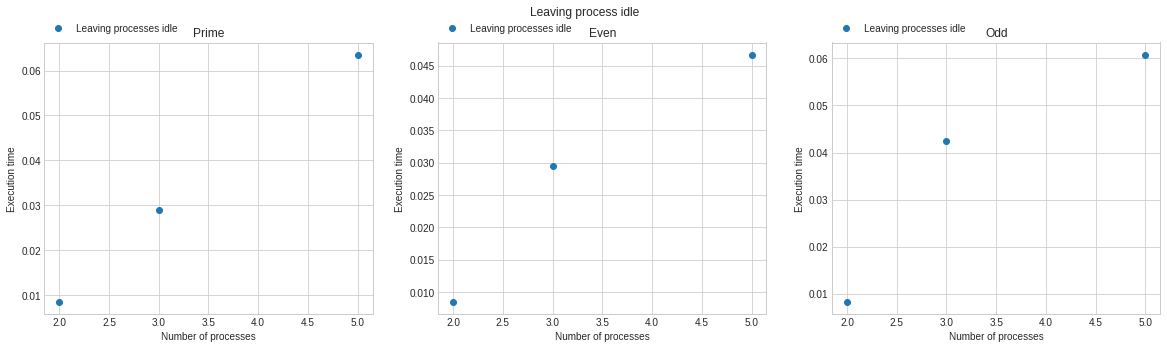

In [ ]:
plt.suptitle('Leaving process idle')

plt.subplot(1, 3, 1)
plt.title('Prime')
plt.xlabel('Number of processes')
plt.ylabel('Execution time')
plt.plot(N_PROCESSES, idle_prime, linestyle='', marker='o', label='Leaving processes idle')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)

plt.subplot(1, 3, 2)
plt.title('Even')
plt.xlabel('Number of processes')
plt.ylabel('Execution time')
plt.plot(N_PROCESSES, idle_even, linestyle='', marker='o', label='Leaving processes idle')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)

plt.subplot(1, 3, 3)
plt.title('Odd')
plt.xlabel('Number of processes')
plt.ylabel('Execution time')
plt.plot(N_PROCESSES, idle_odd, linestyle='', marker='o', label='Leaving processes idle')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)

plt.show()

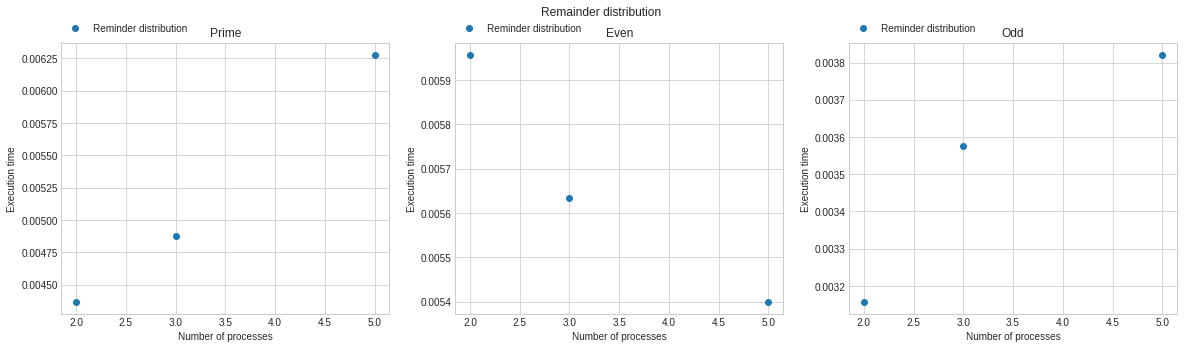

In [ ]:
#@title
plt.suptitle('Remainder distribution')

plt.subplot(1, 3, 1)
plt.title('Prime')
plt.xlabel('Number of processes')
plt.ylabel('Execution time')
plt.plot(N_PROCESSES, rmnd_dist_prime, linestyle='', marker='o', label='Reminder distribution')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)

plt.subplot(1, 3, 2)
plt.title('Even')
plt.xlabel('Number of processes')
plt.ylabel('Execution time')
plt.plot(N_PROCESSES, rmnd_dist_even, linestyle='', marker='o', label='Reminder distribution')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)

plt.subplot(1, 3, 3)
plt.title('Odd')
plt.xlabel('Number of processes')
plt.ylabel('Execution time')
plt.plot(N_PROCESSES, rmnd_dist_odd, linestyle='', marker='o', label='Reminder distribution')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)

plt.show()

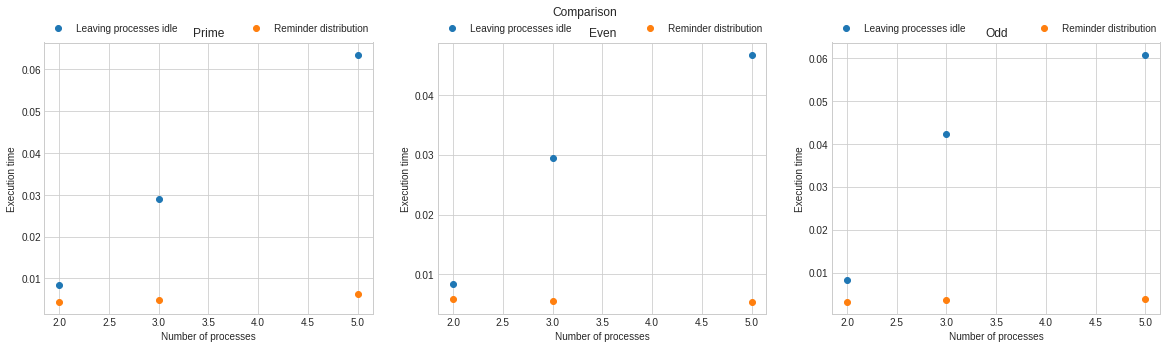

In [ ]:
#@title
plt.suptitle('Comparison')

plt.subplot(1, 3, 1)
plt.title('Prime')
plt.xlabel('Number of processes')
plt.ylabel('Execution time')
plt.plot(N_PROCESSES, idle_prime, linestyle='', marker='o', label='Leaving processes idle')
plt.plot(N_PROCESSES, rmnd_dist_prime, linestyle='', marker='o', label='Reminder distribution')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)

plt.subplot(1, 3, 2)
plt.title('Even')
plt.xlabel('Number of processes')
plt.ylabel('Execution time')
plt.plot(N_PROCESSES, idle_even, linestyle='', marker='o', label='Leaving processes idle')
plt.plot(N_PROCESSES, rmnd_dist_even, linestyle='', marker='o', label='Reminder distribution')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)

plt.subplot(1, 3, 3)
plt.title('Odd')
plt.xlabel('Number of processes')
plt.ylabel('Execution time')
plt.plot(N_PROCESSES, idle_odd, linestyle='', marker='o', label='Leaving processes idle')
plt.plot(N_PROCESSES, rmnd_dist_odd, linestyle='', marker='o', label='Reminder distribution')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)

plt.show()

### Comments

The *reminder distribution* approach allows a better distribution of the vector elements among all the processes, hence, the program execution using 3 and 5 processes is sometimes even 10 times faster than the *leaving processes idle* approach. It can be noticed that the greater number of processes, the greater the execution time ratio between the two approaches.

Additionally, it can be observed that greater number of processors used does not always mean a faster execution. The cause of that is a greater time spent on combining the results than actually producing the results themselves. It becomes more visible as the number of elements to sort decreases. This can be observed on the outputs for 3 and 5 processes of the *reminder distribution* approach for the smallest problem, which is the *Odd* one containing 729 elements.